# Hierarchical clustering lab

For this exercise we are using the USArrest data which is one of the datasets provided by R, more information can be found on https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/USArrests.html.
It contains data on the rate of arrests for murder, assault and rape per 100000 inhabitants and the percentage of urban population per US state.

In [1]:
%matplotlib inline 

import pandas as pd
import numpy as np
from sklearn import cluster, metrics
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster
from scipy.spatial.distance import pdist
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot') 
from matplotlib import cm
pd.set_option('display.max_columns', None)
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

#### 1. Load the dataset from the provided file

In [2]:
df = pd.read_csv('../USArrests.csv')
df = df.rename(columns={'Unnamed: 0': 'States'})

In [3]:
df.head()

,States,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


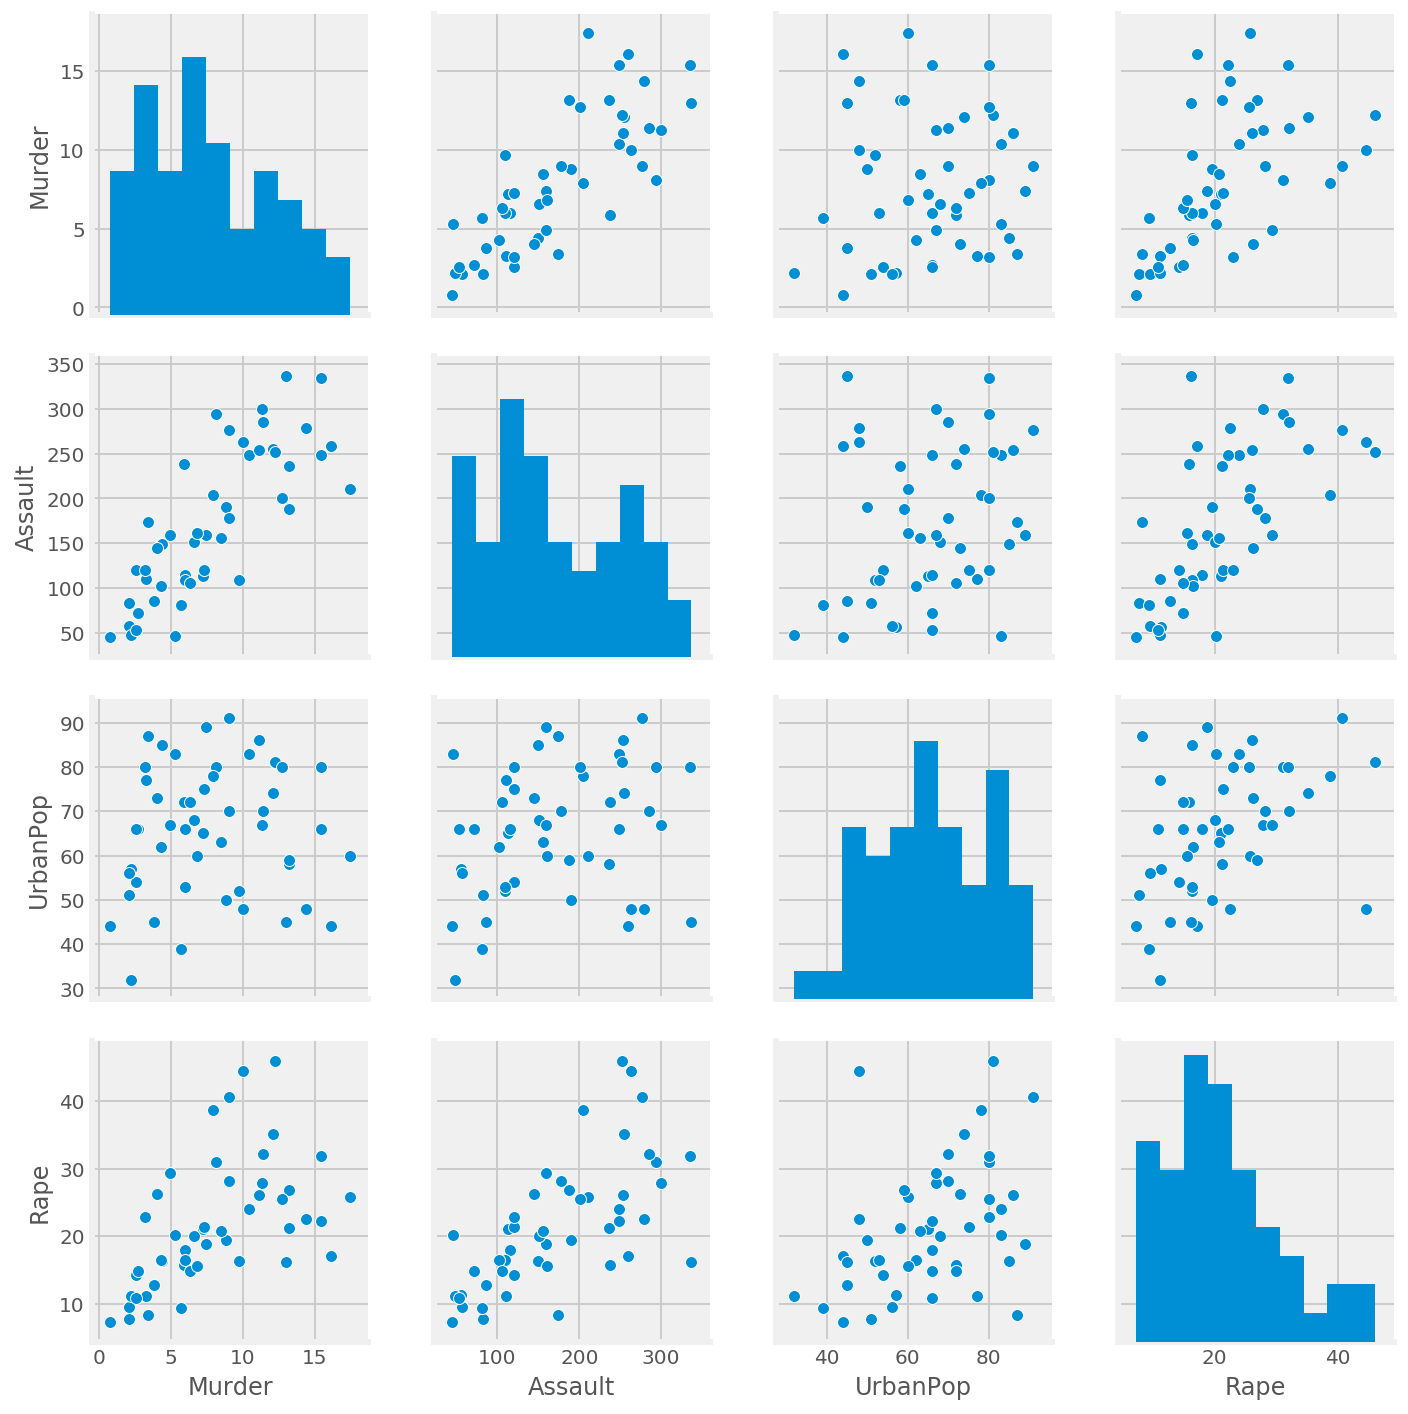

In [5]:
sns.pairplot(df)
plt.show()

#### 2. Use a standard scaler to rescale the data

In [6]:
scaler = StandardScaler()
X = scaler.fit_transform(df.iloc[:,1:])
X[:5]

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393]])

#### 3. Obtain the principal components for the rescaled data of 2.

In [7]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
df_pca = pd.DataFrame(X_pca,columns=['PC1','PC2'])#,'PC3','PC4'])
df_pca['States'] = df.States

In [8]:
pca.components_

array([[ 0.53589947,  0.58318363,  0.27819087,  0.54343209],
       [ 0.41818087,  0.1879856 , -0.87280619, -0.16731864]])

In [9]:
pca.explained_variance_ratio_

array([0.62006039, 0.24744129])

In [10]:
df_pca.head()

,PC1,PC2,States
0,0.985566,1.133392,Alabama
1,1.950138,1.073213,Alaska
2,1.763164,-0.745957,Arizona
3,-0.141420,1.119797,Arkansas
4,2.523980,-1.542934,California


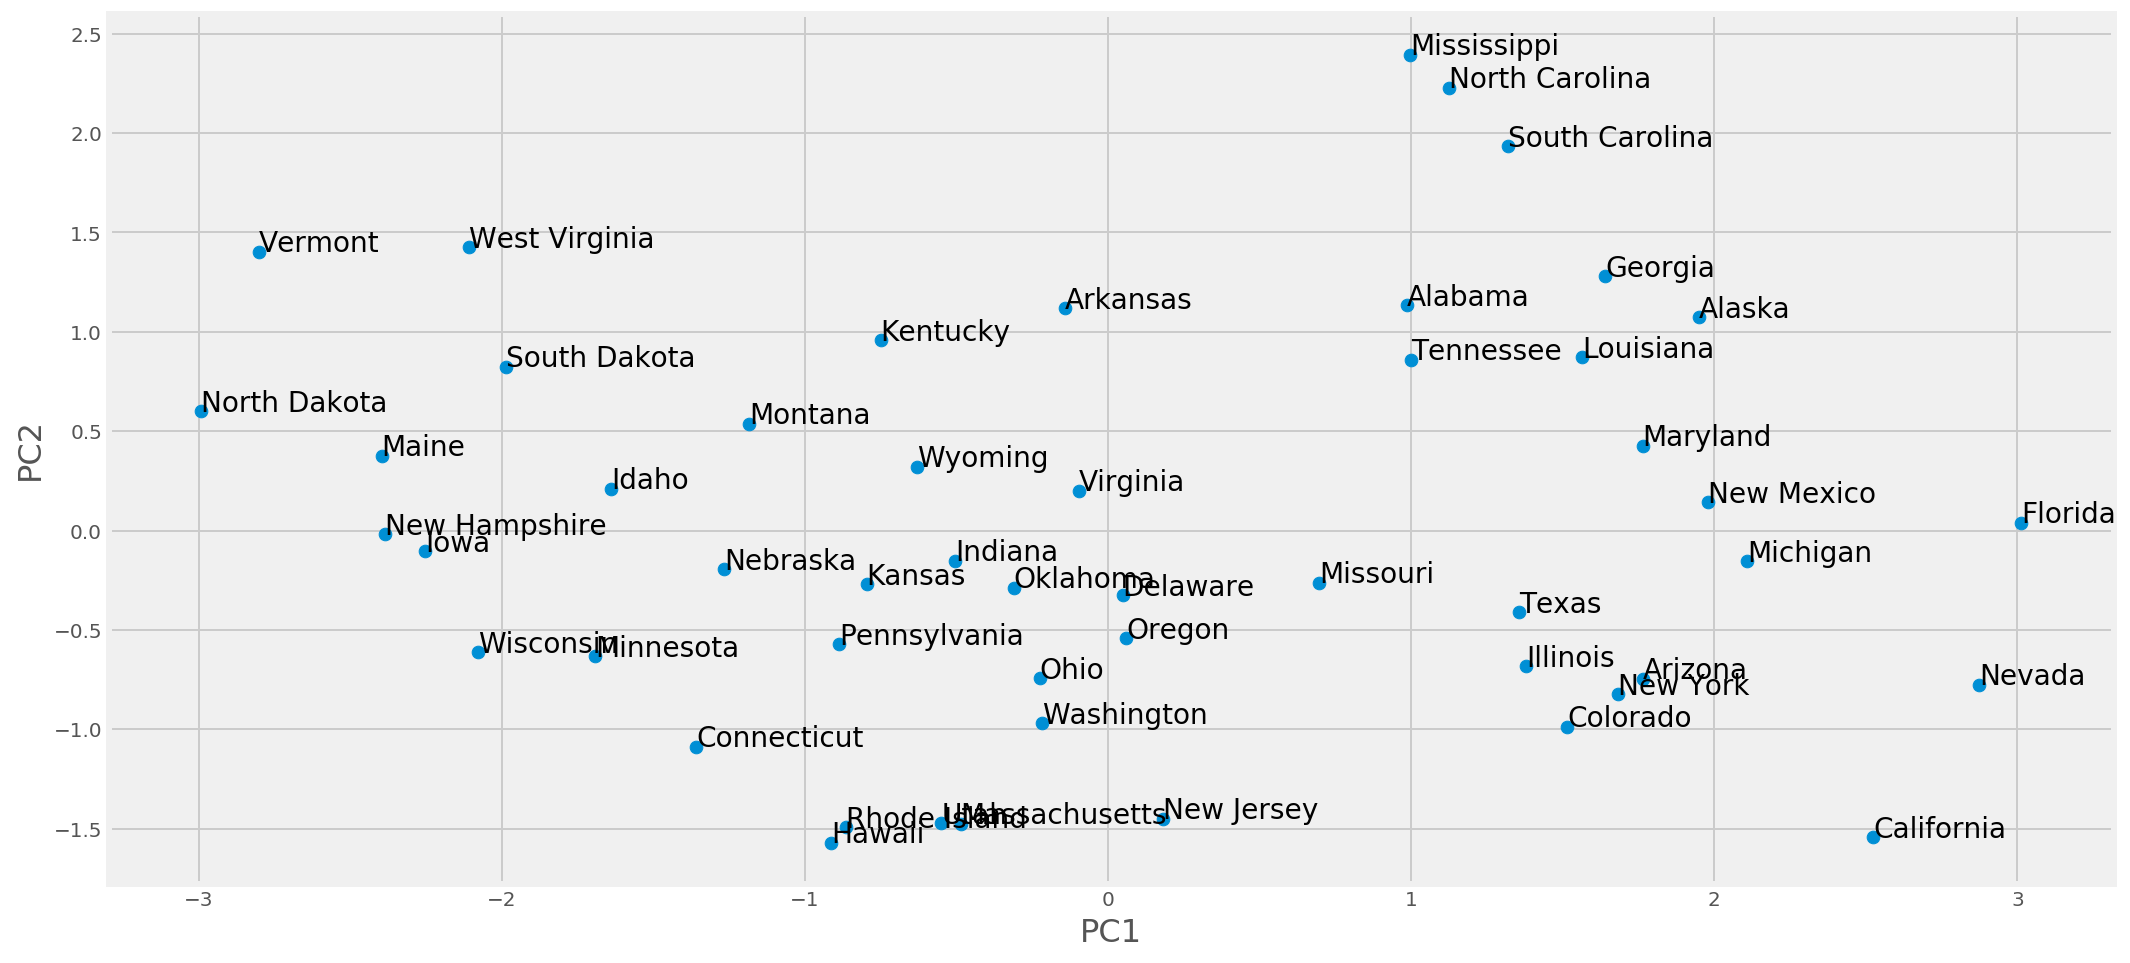

In [11]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
ax.scatter(df_pca.PC1,df_pca.PC2, 
    s = 40,
    cmap = cm.get_cmap('rainbow'))
for i, xi in enumerate(df_pca['States']):
    ax.annotate(xi, (df_pca.iloc[i,0], df_pca.iloc[i,1]),fontsize=14)
plt.xlabel('PC1',fontsize=16)
plt.ylabel('PC2',fontsize=16)
plt.show()

#### 4. Perform hierarchical clustering on the rescaled dataset from 2., calculate the cophenetic correlation and distances and plot the resulting dendrogram

In [12]:
Z = linkage(X, 'ward')
c, coph_dists = cophenet(Z, pdist(X))
print(c)


0.6975265632370389


In [15]:
!open .

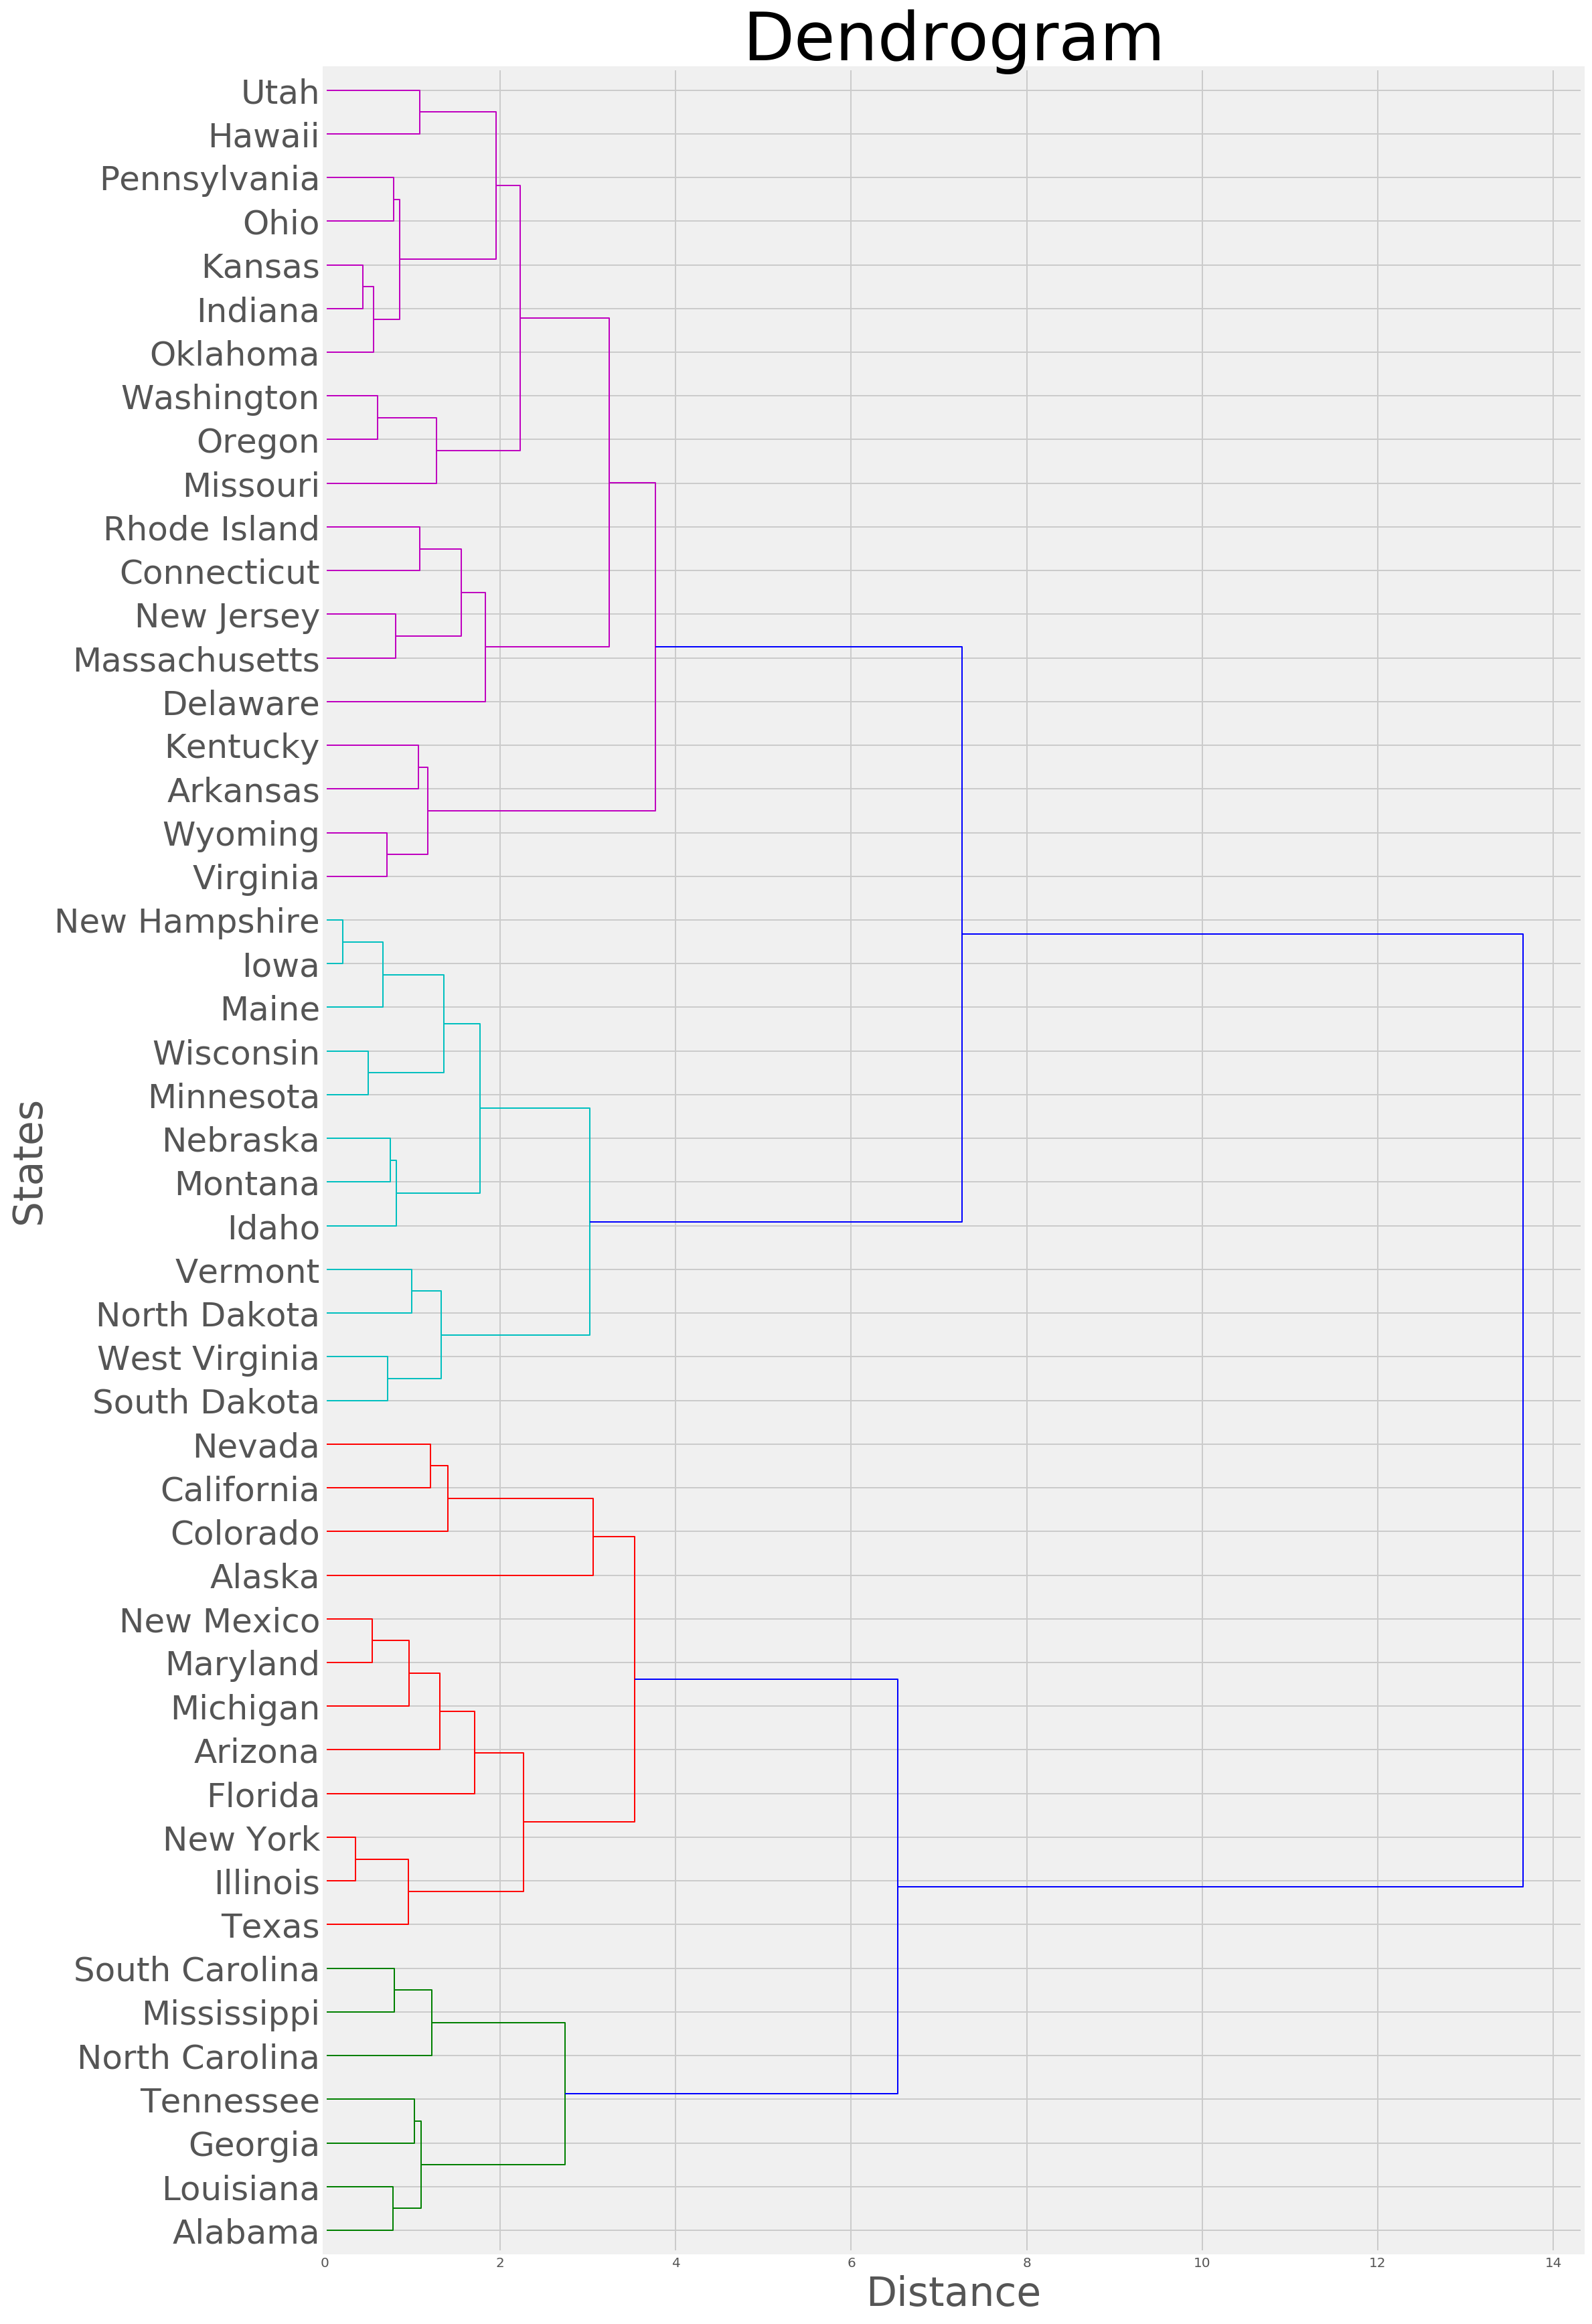

In [16]:
plt.figure(figsize=(15, 30))
plt.title('Dendrogram',fontsize=50)
plt.xlabel('Distance',fontsize=30)
plt.ylabel('States',fontsize=30)
dendrogram(
    Z,
    orientation='right',
#     leaf_rotation=90.,  
    leaf_font_size=18.,
    labels = df.States.values,
    color_threshold = 6
)
plt.yticks(fontsize=25.)
plt.savefig('dendo_crim_R.png')
plt.show()


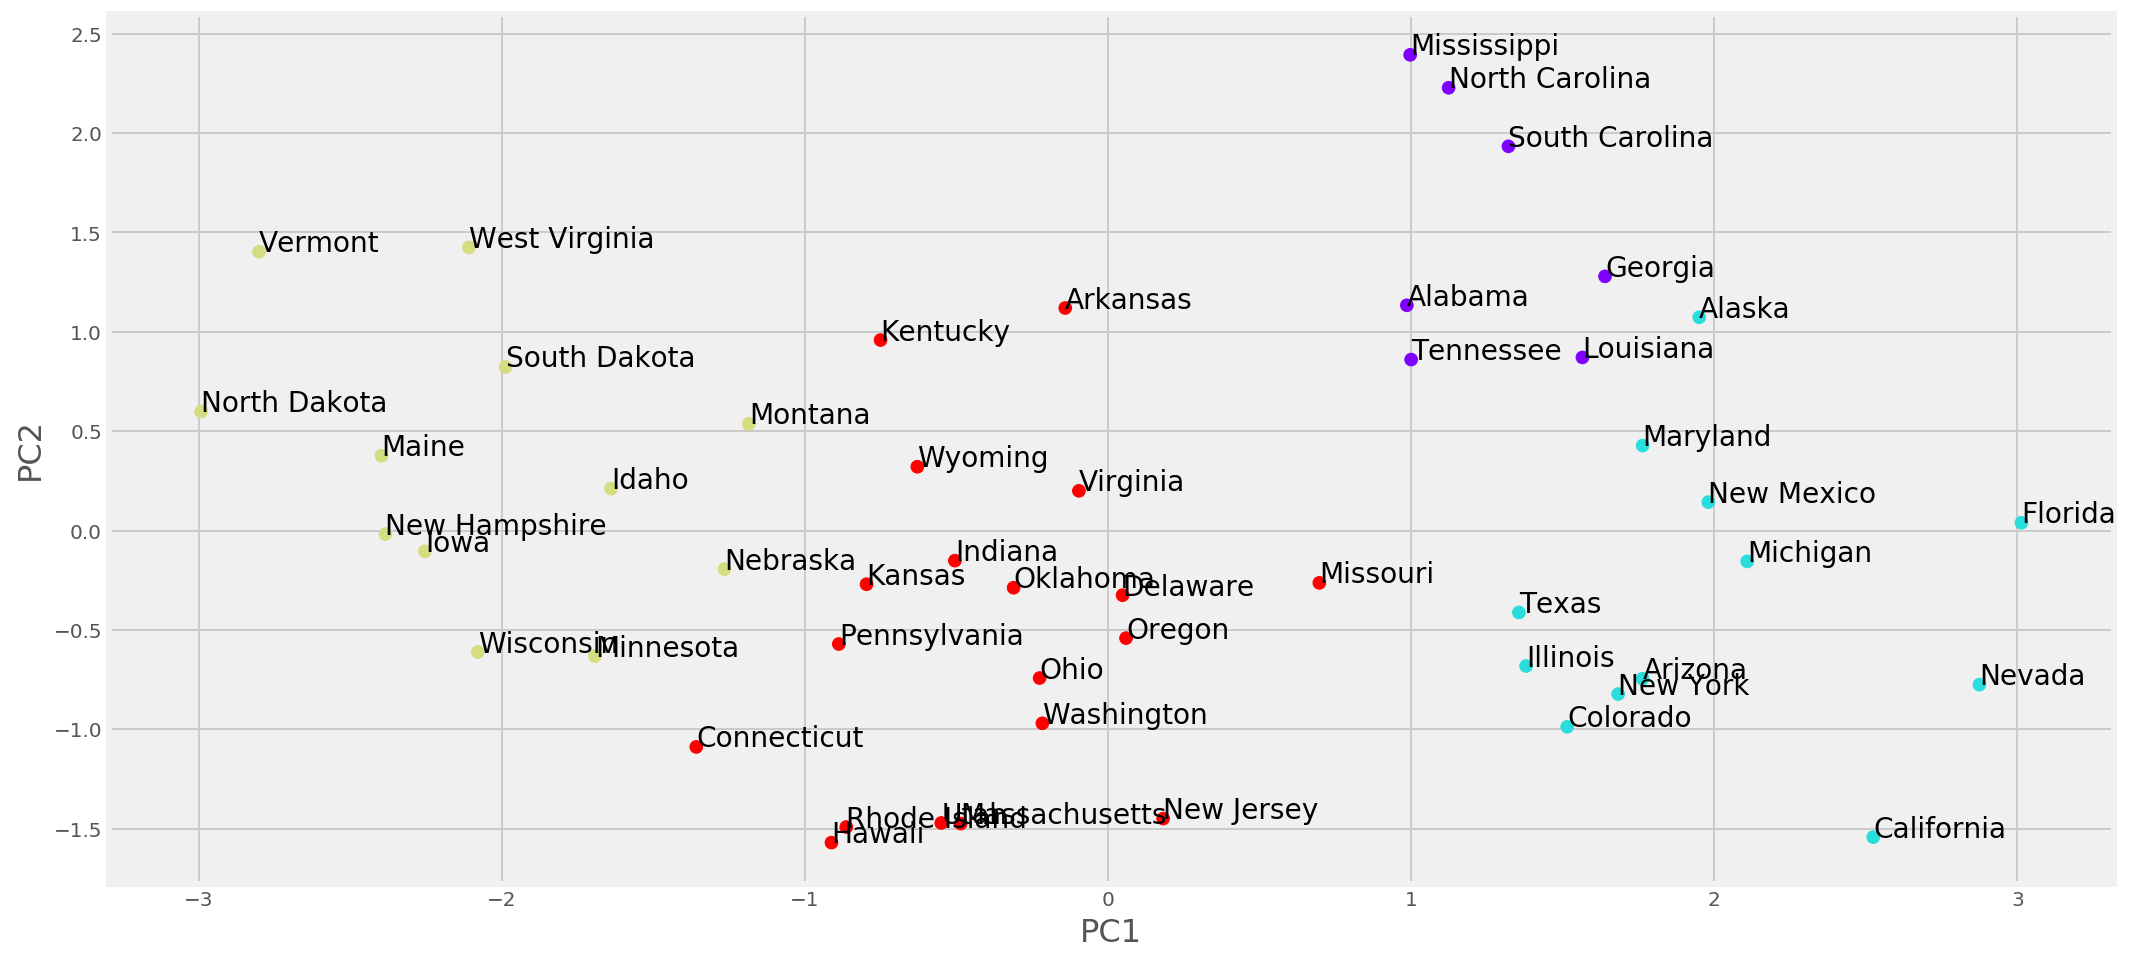

In [14]:
max_d = 4
clusters = fcluster(Z, max_d, criterion='distance')
# print(dict(zip(df.States,clusters)))

fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
ax.scatter(df_pca.PC1,df_pca.PC2, c=clusters,
    s = 40,
    cmap = cm.get_cmap('rainbow'))
for i, xi in enumerate(df_pca['States']):
    ax.annotate(xi, (df_pca.iloc[i,0], df_pca.iloc[i,1]),fontsize=14)
plt.xlabel('PC1',fontsize=16)
plt.ylabel('PC2',fontsize=16)
plt.show()

#### 5. Perform hierarchical clustering on the first two principal components obtained in 3 , calculate the cophenetic correlation and plot the resulting dendrogram. Do you observe any differences compared to clustering on all features done in 4?

In [15]:
Z = linkage(X_pca[:,:2], 'ward')
c, coph_dists = cophenet(Z, pdist(X_pca))
print (c)
print (coph_dists.mean())

0.7190081239032912
8.909460312092797


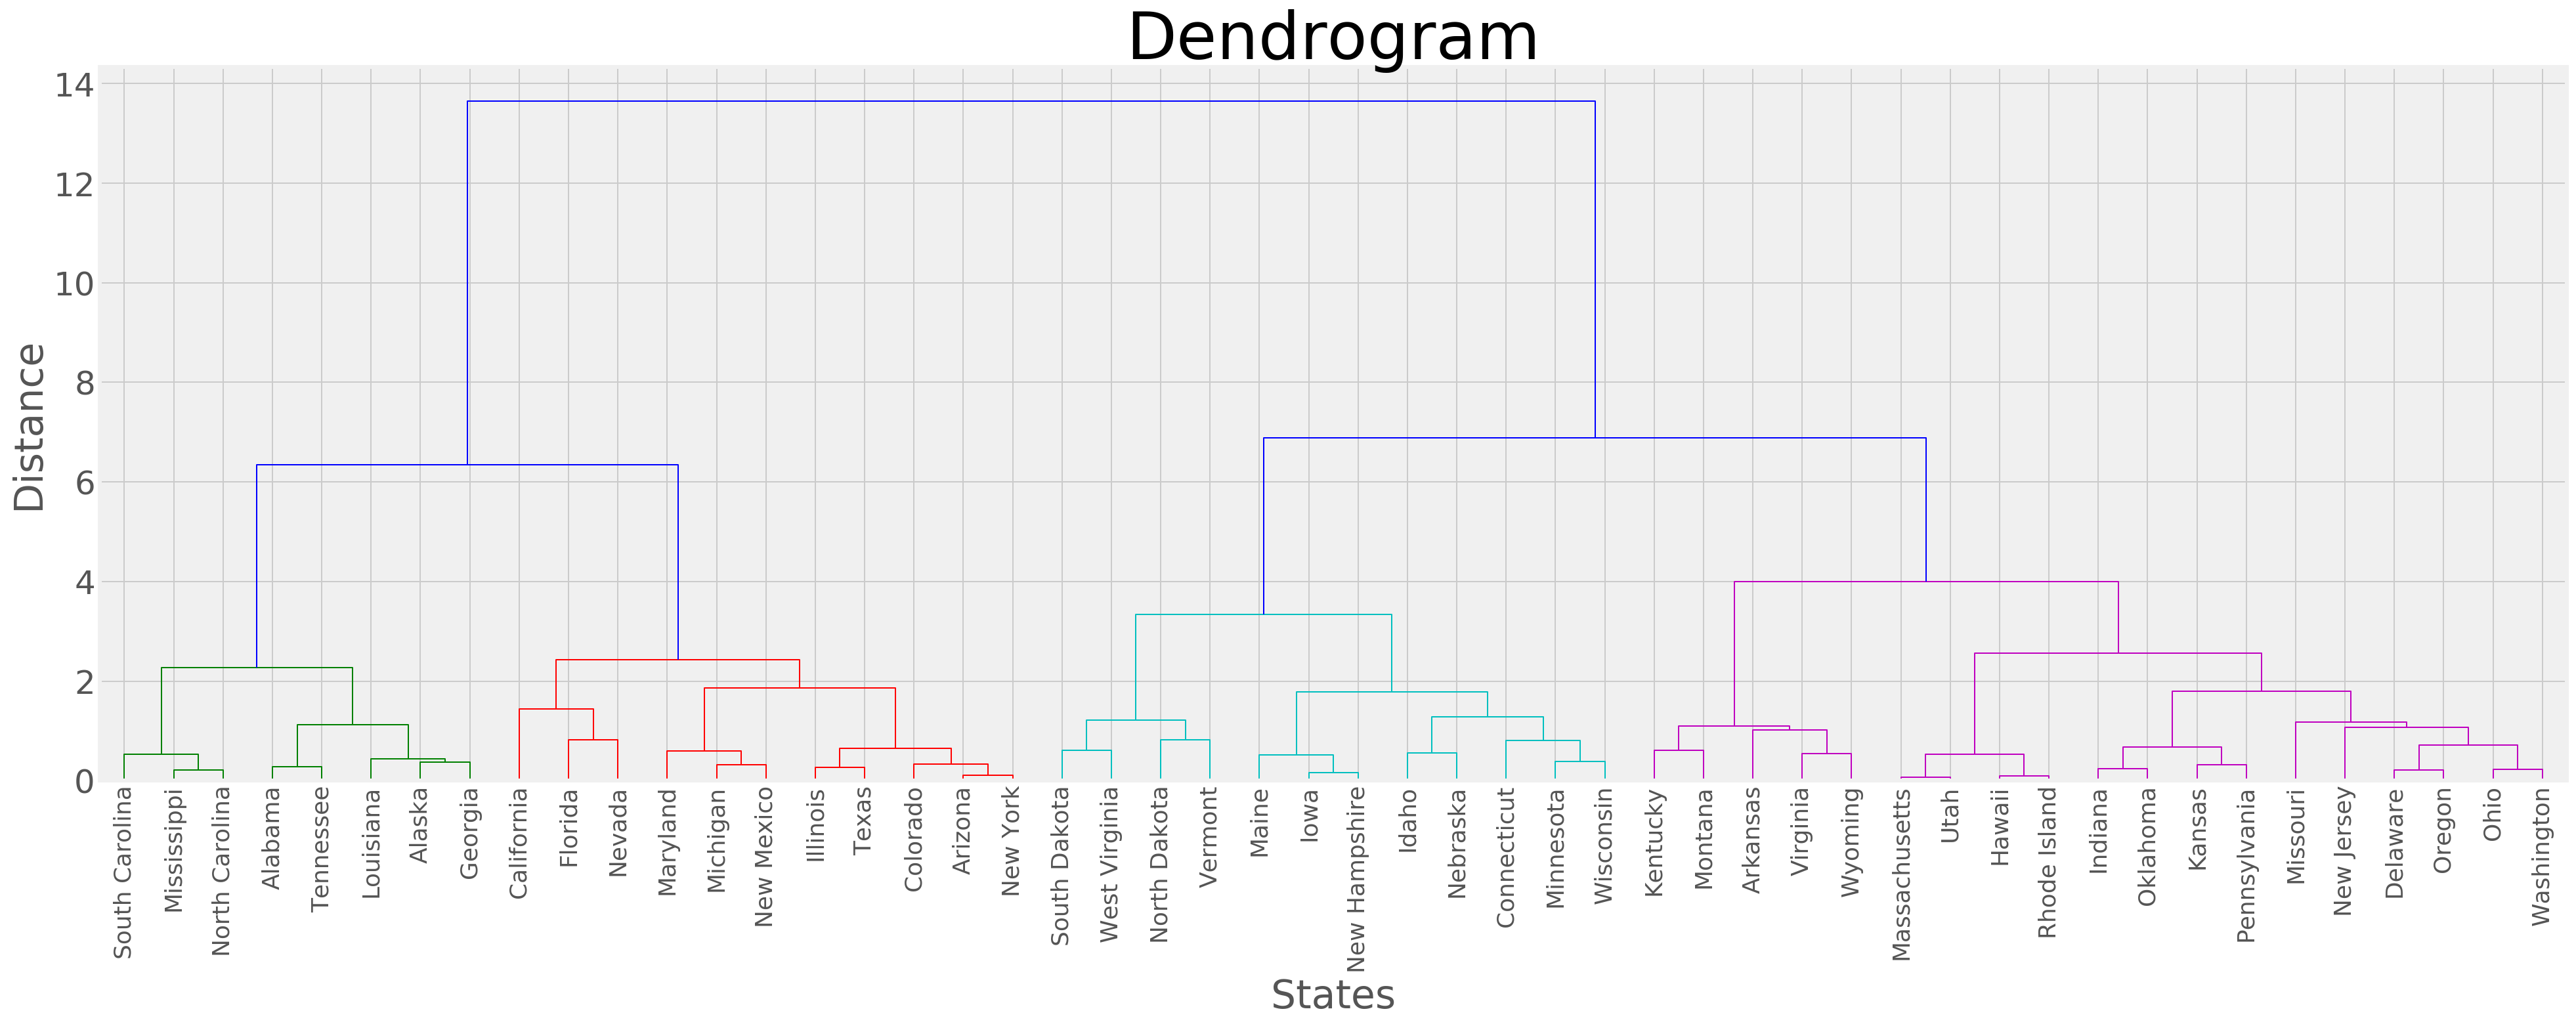

In [16]:
plt.figure(figsize=(30, 10))
plt.title('Dendrogram',fontsize=50)
plt.xlabel('States',fontsize=30)
plt.ylabel('Distance',fontsize=30)
dendrogram(
    Z,
    leaf_rotation=90.,  
    leaf_font_size=18.,
    labels = [state[:] for state in df.States],
    color_threshold = 4
)
plt.yticks(fontsize=25.)
plt.savefig('dendo_crim_R_pca.png')
plt.show()



#### 6. Now take the clustering from 5 and obtain cluster labels for the data points using the fcluster function. Vary the threshold. Produce a plot which shows the number of different clusters obtained versus the threshold value. 

In [17]:
cluster_num = []
for max_d in np.arange(0,10,0.1):
    clusters = fcluster(Z, max_d, criterion='distance')
    cluster_num.append((max_d,len(set(clusters))))

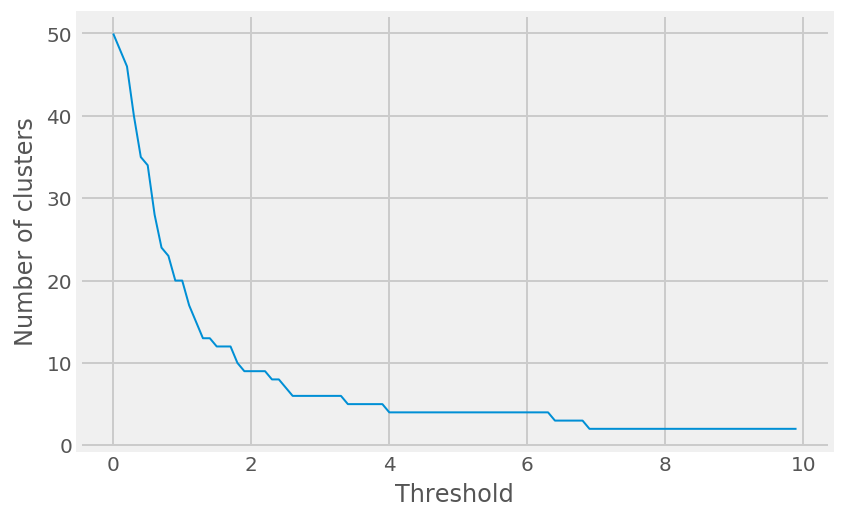

In [18]:
plt.plot(np.array(cluster_num)[:,0],np.array(cluster_num)[:,1])
plt.xlabel('Threshold')
plt.ylabel('Number of clusters')
plt.show()

#### 6.bis Using the inconsistancy metric along with the Elbow method, identify what could be a good number of cluster

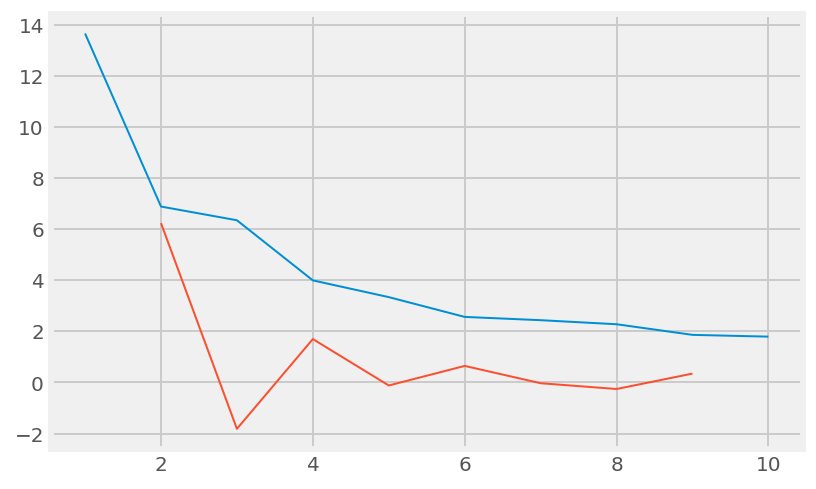

clusters: 2


In [19]:
from scipy.cluster.hierarchy import inconsistent

depth = 10
incons = inconsistent(Z, depth)
incons[-10:]

last = Z[-10:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)

acceleration = np.diff(last, 2) 
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()
k = acceleration_rev.argmax() + 2  # if idx 0 is the max of this we want 2 clusters
print("clusters:", k)

#### 7. Continue with the results from 5 and 6. Set your threshold so that 4 different clusters are obtained. Produce a scatter plot of the data with the points coloured according to their cluster label.

{1, 2, 3, 4}
{'Alabama': 1, 'Alaska': 1, 'Arizona': 2, 'Arkansas': 4, 'California': 2, 'Colorado': 2, 'Connecticut': 3, 'Delaware': 4, 'Florida': 2, 'Georgia': 1, 'Hawaii': 4, 'Idaho': 3, 'Illinois': 2, 'Indiana': 4, 'Iowa': 3, 'Kansas': 4, 'Kentucky': 4, 'Louisiana': 1, 'Maine': 3, 'Maryland': 2, 'Massachusetts': 4, 'Michigan': 2, 'Minnesota': 3, 'Mississippi': 1, 'Missouri': 4, 'Montana': 4, 'Nebraska': 3, 'Nevada': 2, 'New Hampshire': 3, 'New Jersey': 4, 'New Mexico': 2, 'New York': 2, 'North Carolina': 1, 'North Dakota': 3, 'Ohio': 4, 'Oklahoma': 4, 'Oregon': 4, 'Pennsylvania': 4, 'Rhode Island': 4, 'South Carolina': 1, 'South Dakota': 3, 'Tennessee': 1, 'Texas': 2, 'Utah': 4, 'Vermont': 3, 'Virginia': 4, 'Washington': 4, 'West Virginia': 3, 'Wisconsin': 3, 'Wyoming': 4}


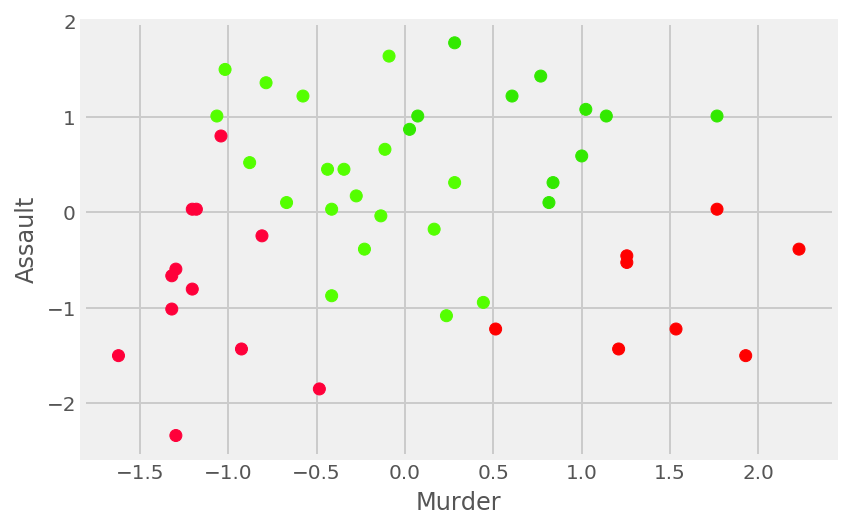

In [20]:
max_d = 4
clusters = fcluster(Z, max_d, criterion='distance')
print (set(clusters))
print (dict(zip(df.States,clusters)))

plt.scatter(X[:,0], X[:,2], c=clusters, cmap='prism')
plt.xlabel(df.columns[1])
plt.ylabel(df.columns[2])
plt.show()

#### Optional 1: Annotate the points in the scatter plot by the state names and identify the states belonging to the same cluster.

In [21]:
df_pca['Cluster'] = clusters
df_pca.head()

,PC1,PC2,States,Cluster
0,0.985566,1.133392,Alabama,1
1,1.950138,1.073213,Alaska,1
2,1.763164,-0.745957,Arizona,2
3,-0.141420,1.119797,Arkansas,4
4,2.523980,-1.542934,California,2


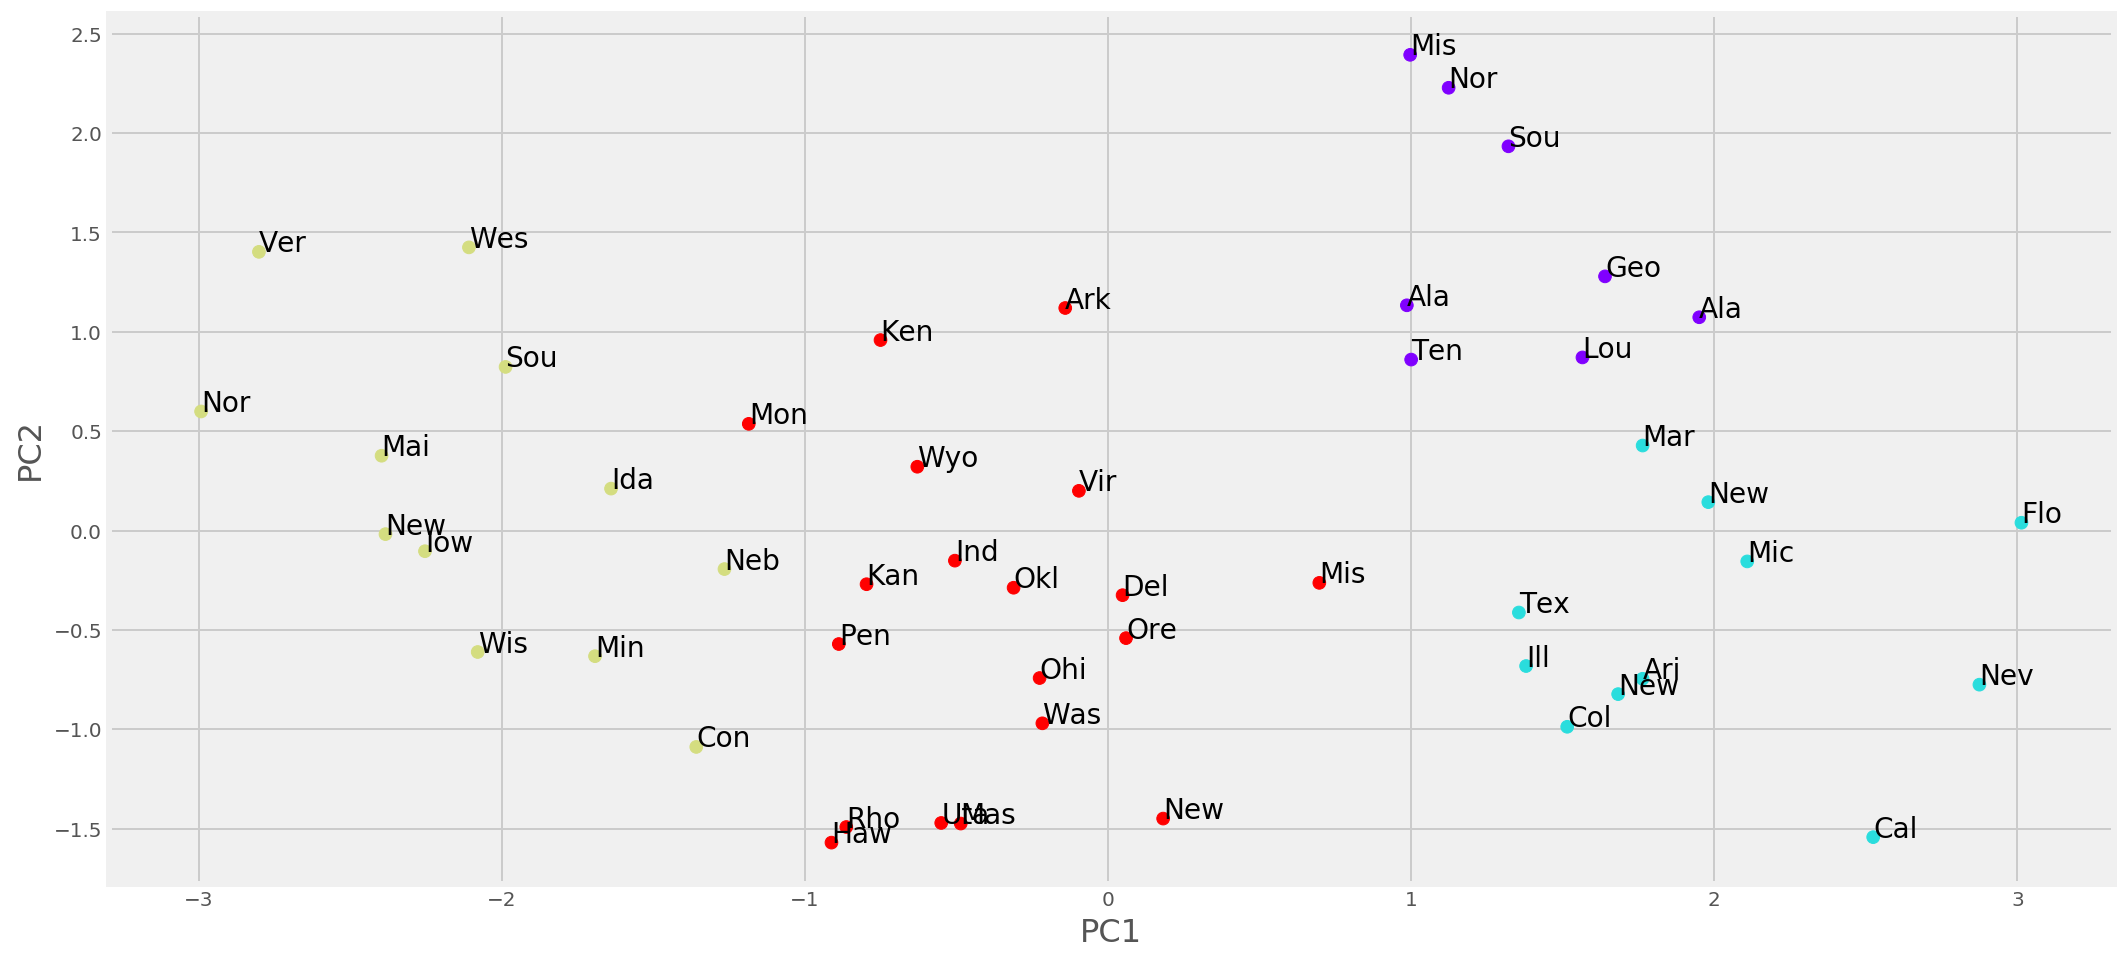

In [22]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
ax.scatter(df_pca.PC1,df_pca.PC2, 
    s = 40,
    c = clusters,
    cmap = cm.get_cmap('rainbow'))
for i, xi in enumerate(df_pca['States']):
    ax.annotate(xi[:3], (df_pca.iloc[i,0], df_pca.iloc[i,1]),fontsize=14)
plt.xlabel('PC1',fontsize=16)
plt.ylabel('PC2',fontsize=16)
plt.show()

In [23]:
pca.components_[:2,:].T

array([[ 0.53589947,  0.41818087],
       [ 0.58318363,  0.1879856 ],
       [ 0.27819087, -0.87280619],
       [ 0.54343209, -0.16731864]])